# Classifcation using K Nearest Neighbour (KNN)

In [1]:
!pip install mglearn

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

## Task 1

In [23]:
#read the breast cancer data from the local device
df = pd.read_csv('C:/Users/mahaa/OneDrive/Desktop/UWE/Semester_2/Machine Learning/Week4/Tutorials/Week4_Tutorial/data/breast-cancer-wisconsin.data.txt')
#df.head()

## Exploratory data analysis

In [24]:
#checking for null values
df.isnull().sum()

id       0
par1     0
par2     0
par3     0
par4     0
par5     0
par6     0
par7     0
par8     0
par9     0
class    0
dtype: int64

In [25]:
#checking for nonsense values
unique_values = []
for col in df.columns:
    unique_values.extend(df[col].unique()) 
print(unique_values)

[1000025, 1002945, 1015425, 1016277, 1017023, 1017122, 1018099, 1018561, 1033078, 1035283, 1036172, 1041801, 1043999, 1044572, 1047630, 1048672, 1049815, 1050670, 1050718, 1054590, 1054593, 1056784, 1057013, 1059552, 1065726, 1066373, 1066979, 1067444, 1070935, 1071760, 1072179, 1074610, 1075123, 1079304, 1080185, 1081791, 1084584, 1091262, 1096800, 1099510, 1100524, 1102573, 1103608, 1103722, 1105257, 1105524, 1106095, 1106829, 1108370, 1108449, 1110102, 1110503, 1110524, 1111249, 1112209, 1113038, 1113483, 1113906, 1115282, 1115293, 1116116, 1116132, 1116192, 1116998, 1117152, 1118039, 1120559, 1121732, 1121919, 1123061, 1124651, 1125035, 1126417, 1131294, 1132347, 1133041, 1133136, 1136142, 1137156, 1143978, 1147044, 1147699, 1147748, 1148278, 1148873, 1152331, 1155546, 1156272, 1156948, 1157734, 1158247, 1160476, 1164066, 1165297, 1165790, 1165926, 1166630, 1166654, 1167439, 1167471, 1168359, 1168736, 1169049, 1170419, 1170420, 1171710, 1171795, 1171845, 1172152, 1173216, 1173235, 

In [26]:
#replace the ? with number
df.replace('?',-9999, inplace = True)

In [27]:
#delete the id cloumn
df_1 = df.drop(['id'], 1)

## Training and Testing

In [28]:
#divide the data frame into input array and output array
x = np.array(df_1.drop(['class'], 1)) 
y = np.array(df_1['class'])

In [29]:
#Split the data into training data and testing data
#random state is used to produce the same training and testing data every time this function is run
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [30]:
#train the data using KNN with one neighbor
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_train, y_train)

#evaluate the model in the training and testing data
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

1.0
0.9714285714285714


In [31]:
#predict the class of new instance using the model
data = np.array([4,3,3,2,1,2,1,1,2])
print(data.reshape(1,-1))
prediction = clf.predict(data.reshape(1,-1)) #-1 means unknown dimension, it will be calculated
print(prediction)

[[4 3 3 2 1 2 1 1 2]]
[2]


### Task 1a
Change the number of neighbors and test the model

In [32]:
#train the data using KNN with diffrent neighbors values with the default distance function
for n in range(1,11):
    clf_1 = KNeighborsClassifier(n_neighbors = n)
    clf_1.fit(X_train, y_train)

    #evaluate the model in the training and testing data
    print("The accuracy of KNN with", n, "neighbors in the training data is:", round(clf_1.score(X_train,y_train),3))
    print("The accuracy of KNN with", n, "neighbors in the testing data is:", round(clf_1.score(X_test, y_test),3), "\n")

The accuracy of KNN with 1 neighbors in the training data is: 1.0
The accuracy of KNN with 1 neighbors in the testing data is: 0.971 

The accuracy of KNN with 2 neighbors in the training data is: 0.977
The accuracy of KNN with 2 neighbors in the testing data is: 0.954 

The accuracy of KNN with 3 neighbors in the training data is: 0.977
The accuracy of KNN with 3 neighbors in the testing data is: 0.977 

The accuracy of KNN with 4 neighbors in the training data is: 0.975
The accuracy of KNN with 4 neighbors in the testing data is: 0.977 

The accuracy of KNN with 5 neighbors in the training data is: 0.977
The accuracy of KNN with 5 neighbors in the testing data is: 0.983 

The accuracy of KNN with 6 neighbors in the training data is: 0.969
The accuracy of KNN with 6 neighbors in the testing data is: 0.971 

The accuracy of KNN with 7 neighbors in the training data is: 0.977
The accuracy of KNN with 7 neighbors in the testing data is: 0.971 

The accuracy of KNN with 8 neighbors in the

The model performs better when training with KNN with 5 neighours

### Task 1b
Leave the id column and evaluate the model

In [33]:
#divide the data frame into input array and output array
x1 = np.array(df.drop(['class'], 1)) 
y1 = np.array(df['class'])

#Split the data into training data and testing data
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, random_state = 0)

#train the data using KNN with diffrent neighbors values
for n in range(2,11):
    clf_2 = KNeighborsClassifier(n_neighbors = n)
    clf_2.fit(X_train1, y_train1)

    #evaluate the model in the training and testing data
    print("The accuracy of KNN with", n, "neighbors in the training data is:", round(clf_2.score(X_train1,y_train1),3))
    print("The accuracy of KNN with", n, "neighbors in the testing data is:", round(clf_2.score(X_test1, y_test1),3), "\n")

The accuracy of KNN with 2 neighbors in the training data is: 0.809
The accuracy of KNN with 2 neighbors in the testing data is: 0.6 

The accuracy of KNN with 3 neighbors in the training data is: 0.815
The accuracy of KNN with 3 neighbors in the testing data is: 0.566 

The accuracy of KNN with 4 neighbors in the training data is: 0.739
The accuracy of KNN with 4 neighbors in the testing data is: 0.611 

The accuracy of KNN with 5 neighbors in the training data is: 0.74
The accuracy of KNN with 5 neighbors in the testing data is: 0.629 

The accuracy of KNN with 6 neighbors in the training data is: 0.718
The accuracy of KNN with 6 neighbors in the testing data is: 0.606 

The accuracy of KNN with 7 neighbors in the training data is: 0.719
The accuracy of KNN with 7 neighbors in the testing data is: 0.566 

The accuracy of KNN with 8 neighbors in the training data is: 0.708
The accuracy of KNN with 8 neighbors in the testing data is: 0.606 

The accuracy of KNN with 9 neighbors in the 

The acuuracy of the model decrese significantly after adding the id column to the model. This is because id in not correlated with the output class. Thus, it does not add any valuable information when predicting the output class.

### Task 1c
Use manhaten distance

In [34]:
#train the data using KNN with diffrent neighbors values and Manhatten distance
for n in range(1,11):
    clf_3 = KNeighborsClassifier(n_neighbors = n, metric = 'manhattan')
    clf_3.fit(X_train, y_train)

    #evaluate the model in the training and testing data
    print("The accuracy of KNN with", n, "neighbors in the training data is:", round(clf_3.score(X_train,y_train),3))
    print("The accuracy of KNN with", n, "neighbors in the testing data is:", round(clf_3.score(X_test, y_test),3), "\n")

The accuracy of KNN with 1 neighbors in the training data is: 1.0
The accuracy of KNN with 1 neighbors in the testing data is: 0.971 

The accuracy of KNN with 2 neighbors in the training data is: 0.979
The accuracy of KNN with 2 neighbors in the testing data is: 0.954 

The accuracy of KNN with 3 neighbors in the training data is: 0.981
The accuracy of KNN with 3 neighbors in the testing data is: 0.971 

The accuracy of KNN with 4 neighbors in the training data is: 0.977
The accuracy of KNN with 4 neighbors in the testing data is: 0.971 

The accuracy of KNN with 5 neighbors in the training data is: 0.973
The accuracy of KNN with 5 neighbors in the testing data is: 0.977 

The accuracy of KNN with 6 neighbors in the training data is: 0.968
The accuracy of KNN with 6 neighbors in the testing data is: 0.971 

The accuracy of KNN with 7 neighbors in the training data is: 0.966
The accuracy of KNN with 7 neighbors in the testing data is: 0.971 

The accuracy of KNN with 8 neighbors in the

Still Euclidean distance gives the heightes model performance

## Task 2
Plot the training acuuracy and the testing accuracy while K range from 1 to 10. Then check which k value is better in this case 

[1.0, 0.9770992366412213, 0.9770992366412213, 0.9751908396946565, 0.9770992366412213, 0.9694656488549618, 0.9770992366412213, 0.9675572519083969, 0.9732824427480916, 0.9618320610687023]
[0.9714285714285714, 0.9542857142857143, 0.9771428571428571, 0.9771428571428571, 0.9828571428571429, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9771428571428571, 0.9714285714285714]


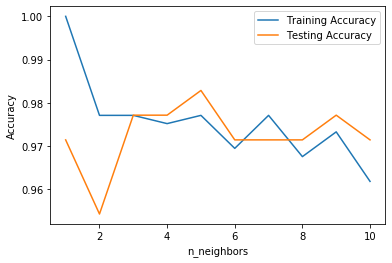

In [35]:
#Plot shows the training and testing accuracy using diffrent K values
training_accuracy = []
testing_accuracy = []

for n_neighbors in range (1,11):
    #build the model
    clf_4 = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf_4.fit(X_train, y_train)
    
    #record training test accuracy
    training_accuracy.append(clf_4.score(X_train, y_train))
    #record training test accuracy
    testing_accuracy.append(clf_4.score(X_test, y_test))
    
print(training_accuracy)
print(testing_accuracy)
    
plt.plot(range(1,11), training_accuracy, label="Training Accuracy")
plt.plot(range(1,11), testing_accuracy, label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

This figure shows the training and testing accuracy when choosing diffrent values for K in KNN. It shows that the training accuracy dicreases when K increases while the testing accuracy increases when K increases. The best K value in this model is when K = 5. This gives the heighest generalisation accuracy and a good training accuracy.

### Task 3
Upload the breast cancer data directly from skit learn. Do all the steps above, again.

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train2, X_test2, y_train2, y_test2 = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66) #stratify parameter will preserve the proportion of output classes as in original dataset, in the train and test datasets as well

#### Task 3a
Data Exploration and finidng missing data

In [9]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

There is no missing data

#### Task 3b
Train a KNN model and check the accuracy of the model with diffrent values of K

In [14]:
#train the data using KNN with diffrent neighbors values
for n in range(1,11):
    clf_5 = KNeighborsClassifier(n_neighbors = n)
    clf_5.fit(X_train2,y_train2)
    
    #evaluate the model in the training and testing data
    print("The accuracy of KNN with", n, "neighbors in the training data is:", round(clf_5.score(X_train2,y_train2),3))
    print("The accuracy of KNN with", n, "neighbors in the testing data is:", round(clf_5.score(X_test2, y_test2),3), "\n")
    
clf_6 = KNeighborsClassifier(n_neighbors = 6)
clf_6.fit(X_train2,y_train2)

The accuracy of KNN with 1 neighbors in the training data is: 1.0
The accuracy of KNN with 1 neighbors in the testing data is: 0.902 

The accuracy of KNN with 2 neighbors in the training data is: 0.977
The accuracy of KNN with 2 neighbors in the testing data is: 0.888 

The accuracy of KNN with 3 neighbors in the training data is: 0.958
The accuracy of KNN with 3 neighbors in the testing data is: 0.923 

The accuracy of KNN with 4 neighbors in the training data is: 0.955
The accuracy of KNN with 4 neighbors in the testing data is: 0.923 

The accuracy of KNN with 5 neighbors in the training data is: 0.948
The accuracy of KNN with 5 neighbors in the testing data is: 0.923 

The accuracy of KNN with 6 neighbors in the training data is: 0.946
The accuracy of KNN with 6 neighbors in the testing data is: 0.937 

The accuracy of KNN with 7 neighbors in the training data is: 0.944
The accuracy of KNN with 7 neighbors in the testing data is: 0.93 

The accuracy of KNN with 8 neighbors in the 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

#### Task 3c
Create a confusion matrix

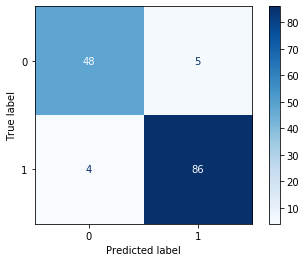

In [15]:
#plot a confusion matrix for this model
plot_confusion_matrix(clf_6, X_test2, y_test2, cmap = plt.cm.Blues)
plt.show()

#### Task 3d
Calculate F1 on data test split

In [16]:
#calculate the predicted values using the model. Then calculate the F1 score  143
y_predicted = clf_6.predict(X_test2)
f1_score(y_test2, y_predicted)

0.9502762430939227

#### Task 3e

### Task 4
Visualise calssifier boundery

In [38]:
x,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(x, y, random_satet = 0)
clf_7 = KNeighborsClassifier(n_neighbors = 3)
fig, axes = plt.subplots(1,3, figsize(10,3))

(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 